In [1]:
% matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy import integrate
from mpl_toolkits.mplot3d import Axes3D 
from matplotlib import cm

In [2]:
j = complex(0,1)

In [12]:
norm = lambda x, y: np.exp(-((x)**2+(y)**2)/10000)
x0 = -512
dx = 1
x=np.arange(x0,-x0,dx)
y0 = -512
dy = 1
y=np.arange(y0,-y0,dy)

In [13]:
X, Y = np.meshgrid(x,y)
nonfour = norm(X,Y)

In [14]:
def get_fourier_2d(X, Y, IMAGE):

#Compute Fourier transform by numpy's FFT function
    g=np.fft.fft2(IMAGE)
#frequency normalization factor is 2*np.pi/dx
    dx = X[0][1]-X[0][0]
    dy = Y[1][0]-Y[0][0]
    wx = np.fft.fftfreq(X[0].size)*2*np.pi/dx
    wy = np.fft.fftfreq(Y[0].size)*2*np.pi/dy
    
    Wx, Wy = np.meshgrid(wx, wy)


#In order to get a discretisation of the continuous Fourier transform
#we need to multiply g by a phase factor
    g*=dx*np.exp(-complex(0,1)*Wx*x0)/(np.sqrt(2*np.pi))*dy*np.exp(-complex(0,1)*Wy*y0)/(np.sqrt(2*np.pi))
    
    return Wx, Wy, g


<IPython.core.display.Javascript object>


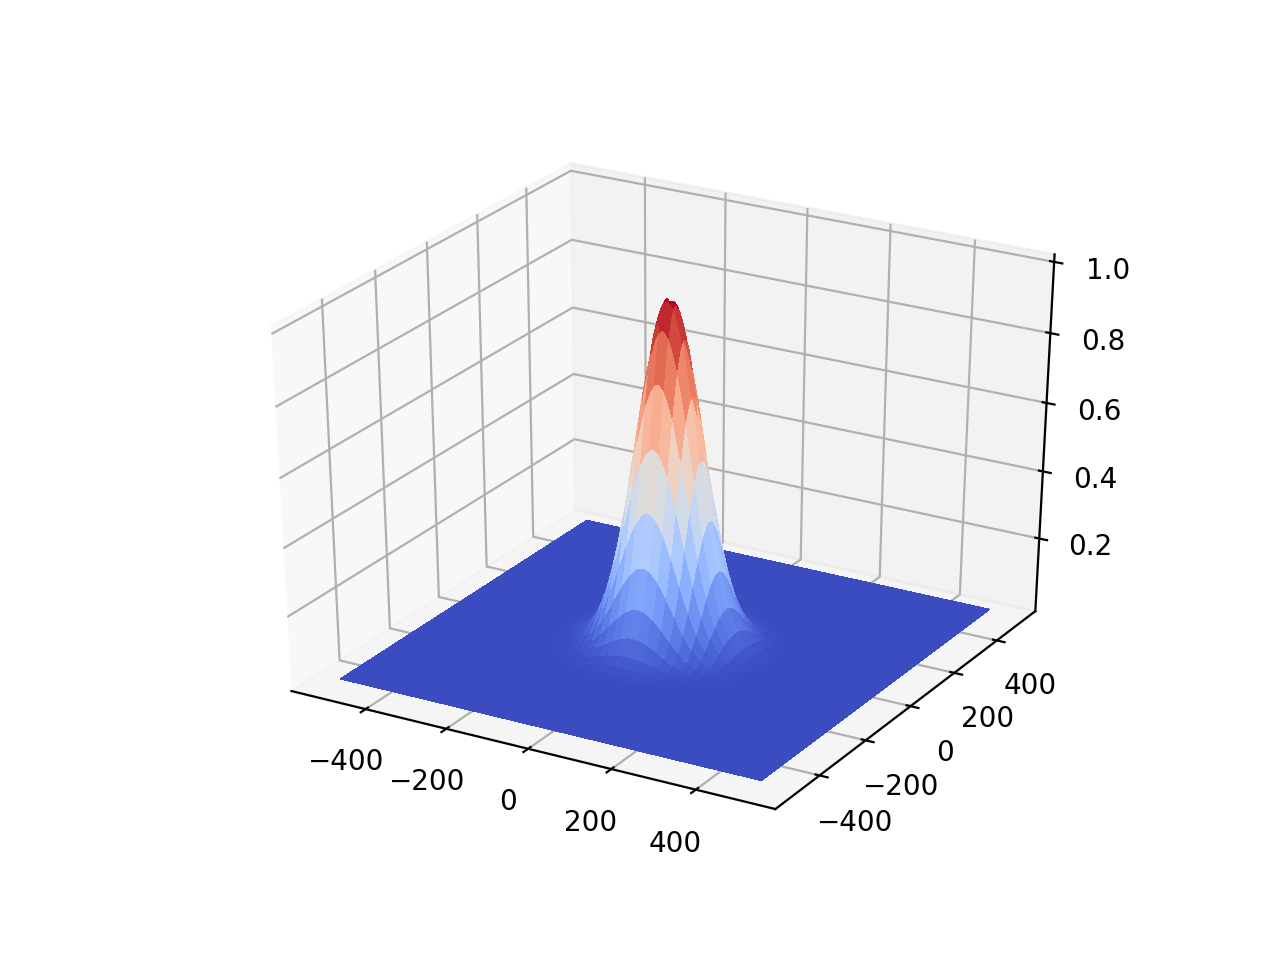

In [15]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, nonfour, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

<IPython.core.display.Javascript object>


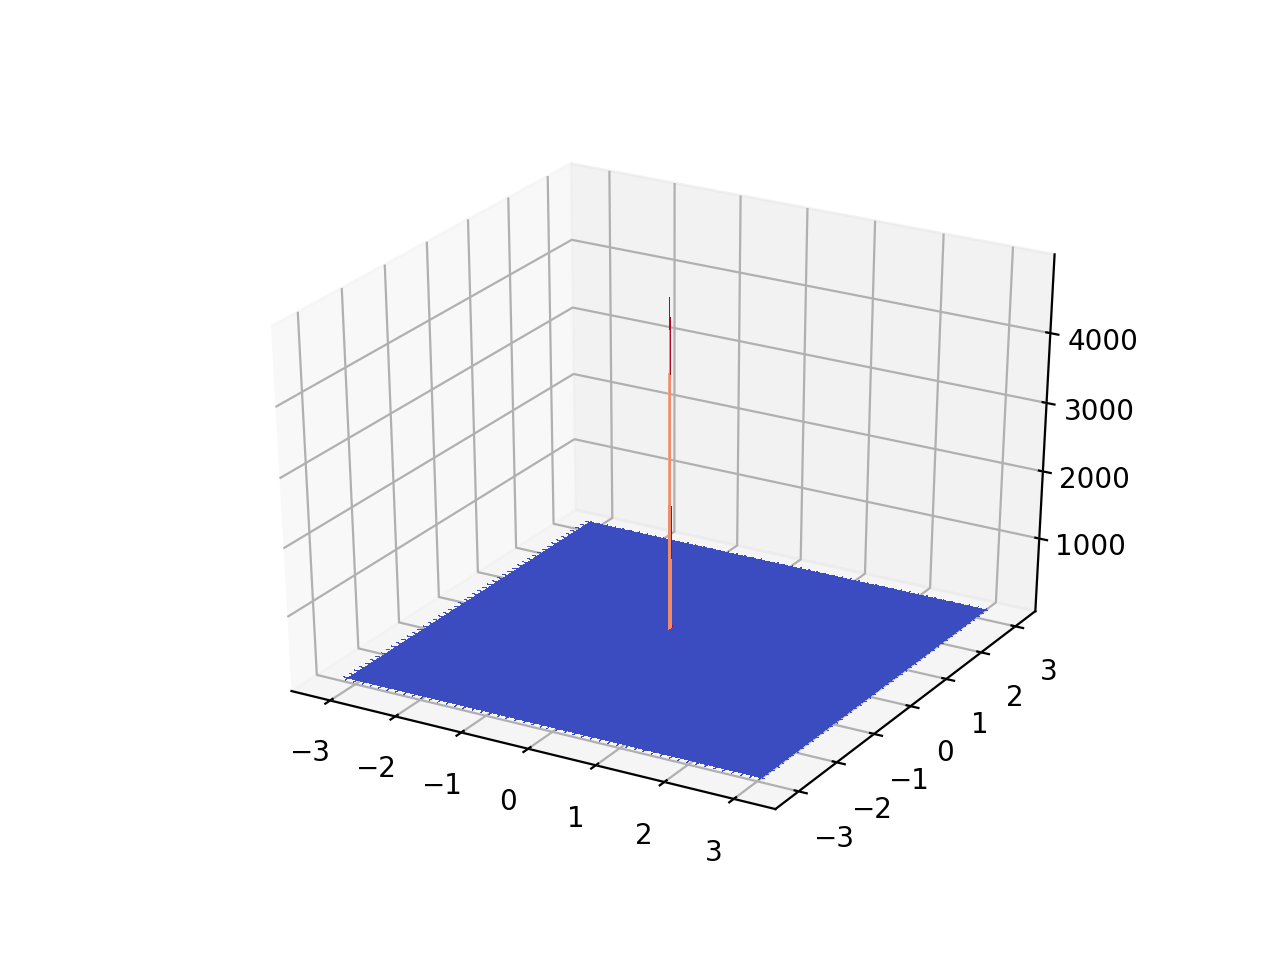

In [16]:
fig = plt.figure()
X, Y = np.meshgrid(x,y)
Wx, Wy, four= get_fourier_2d(X,Y,nonfour)
ax = fig.gca(projection='3d')
ax.plot_surface(Wx, Wy, np.abs(four) , cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

<IPython.core.display.Javascript object>


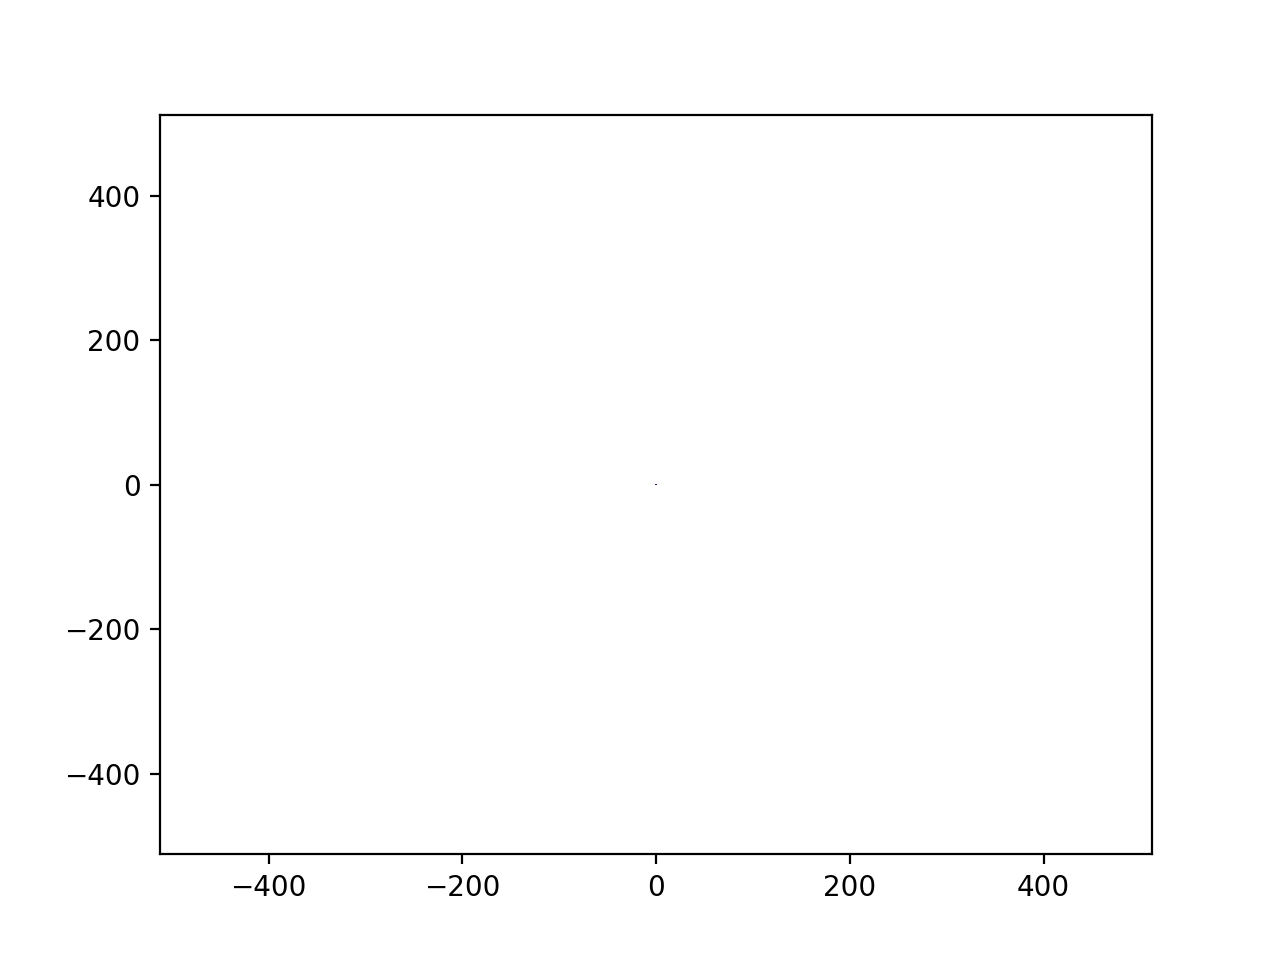

(-512, 512)

In [11]:
fig, ax = plt.subplots()
ax.contourf(Wx, Wy, np.abs(four), 100)
ax.set_xlim(-512,512)
ax.set_ylim(-512,512)

In [9]:
Y[1][0]-Y[0][0]

1

<IPython.core.display.Javascript object>


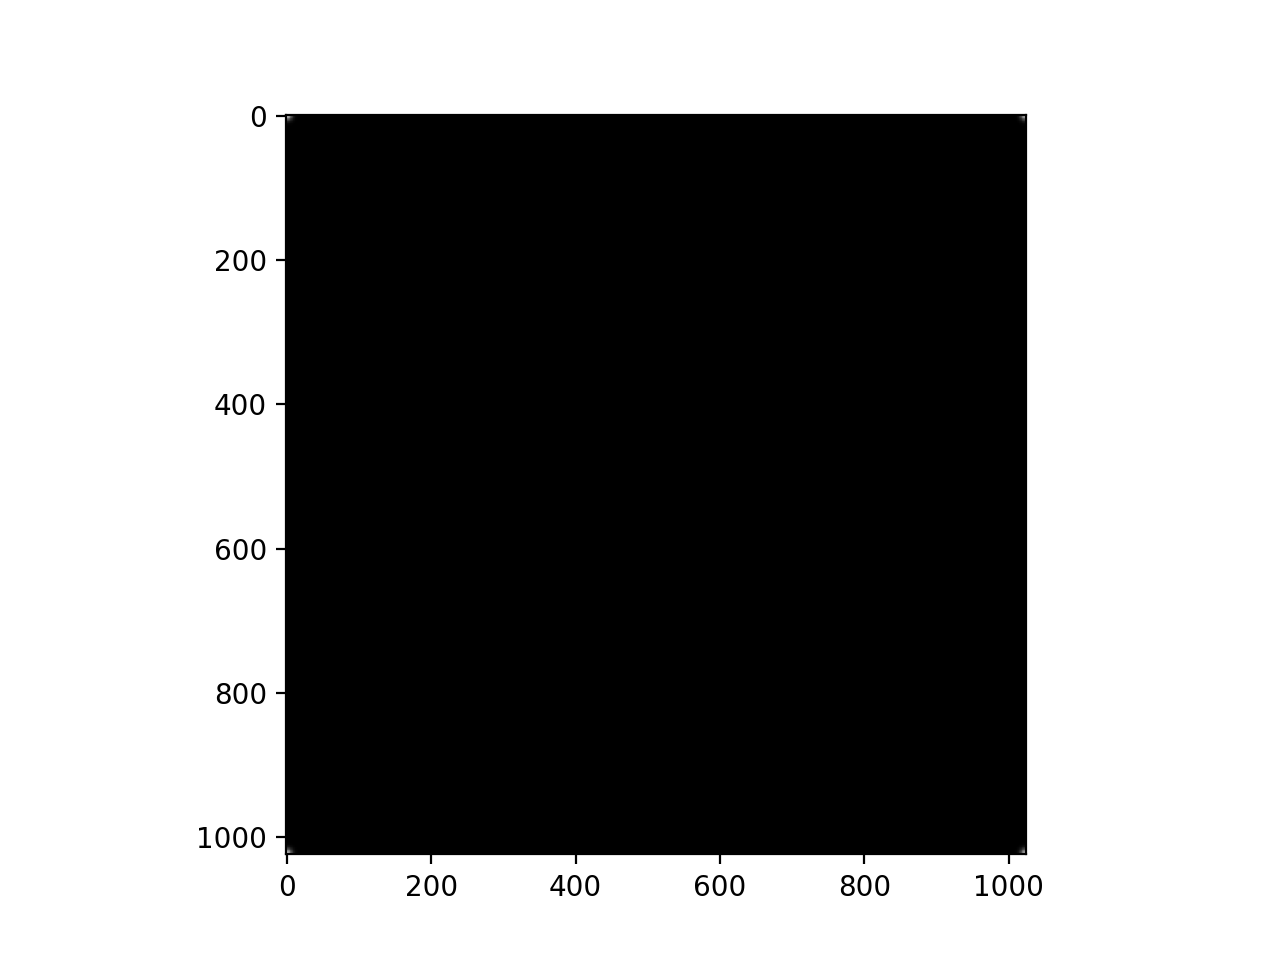

In [10]:
fig = plt.figure()
plt.imshow(np.abs(four), cmap = 'gray')